<a href="https://colab.research.google.com/github/denisecammarota/data-science-course/blob/main/RegressionCorrelation/EDA_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA (Exploratory Data Analysis) Class: A short introduction to the EDA process in R

This class focused on simple EDA, similar to the one I have always done. Let us first load the data that we want to analyse. 

In [6]:
h <- read.csv('datosanalisisexploratorio.txt',sep=',')

First, we identify how many columns there are and which are their types.  We see we have both numeric and several non numeric characteristics.

In [7]:
head(h)

,X,Id,IdDue.o,IdP.gina,DT,Secuencia,Venta,Importe,perros,gatos,⋯,m_sexo,m_edad,peso,idraza,idespecie,idproducto,idtipo,tipo,pbp,vbp
,<int>,<int>,<int>,<int>,<dbl>,<chr>,<int>,<dbl>,<int>,<int>,⋯,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>
1,1,735951,5627,20,2.718248e-05,20-10,0,0,2,0,⋯,M,0.01,11.81,89,1,4,1,Vets,0,0
2,2,231816,5627,11,6.680000e+00,11-6,0,0,2,0,⋯,M,0.01,11.81,89,1,5,1,Vets,0,0
3,3,869461,5627,11,6.100000e-01,11-16-4,0,0,2,0,⋯,M,0.01,11.81,89,1,5,1,Vets,0,0
4,4,842747,5627,2,1.000000e-01,2,0,0,2,0,⋯,M,0.01,11.81,89,1,8,2,Jard n,0,0
5,5,125508,5627,20,3.000000e-02,20-9,0,0,2,0,⋯,M,0.01,11.81,89,1,4,1,Vets,0,0
6,6,98910,5627,20,2.900000e-01,20-18,0,0,2,0,⋯,M,0.01,11.81,89,1,4,1,Vets,0,0


A function that allows us to see these aspects much better is $str$, like we see here:

In [8]:
str(h)

'data.frame':	5140 obs. of  24 variables:
 $ X         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Id        : int  735951 231816 869461 842747 125508 98910 869463 629017 816570 816571 ...
 $ IdDue.o   : int  5627 5627 5627 5627 5627 5627 5627 5627 5627 5627 ...
 $ IdP.gina  : int  20 11 11 2 20 20 17 6 5 5 ...
 $ DT        : num  2.72e-05 6.68 6.10e-01 1.00e-01 3.00e-02 ...
 $ Secuencia : chr  "20-10" "11-6" "11-16-4" "2" ...
 $ Venta     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Importe   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ perros    : int  2 2 2 2 2 2 2 2 2 2 ...
 $ gatos     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ total     : int  2 2 2 2 2 2 2 2 2 2 ...
 $ d_edad    : int  67 67 67 67 67 67 67 67 67 67 ...
 $ d_sexo    : chr  "F" "F" "F" "F" ...
 $ ingreso   : int  30284 30284 30284 30284 30284 30284 30284 30284 30284 30284 ...
 $ m_sexo    : chr  "M" "M" "M" "M" ...
 $ m_edad    : num  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 ...
 $ peso      : num  11.8 11.8 11.8 11.8 11.8 ...
 $ idraza    : in

And then we have the rows and columns, which were also indicated with the above function:

In [10]:
print(paste('Rows: ',nrow(h),' Columns: ',ncol(h)))

[1] "Rows:  5140  Columns:  24"


Finally, let's pay attention to the non numeric values using the levels functions. To do that first, we need to transform data from dataframe to categorical data. Then, we can apply the levels function. For the two sexo fields, there is (sadly for this dataset) two binary options. The tipo column has three possible values: Jard n, Pileta, Vets. 

In [37]:
h$d_sexo <- as.factor(h$d_sexo)
h$m_sexo <- as.factor(h$m_sexo)
h$tipo <- as.factor(h$tipo)

In [40]:
print('d_sexo:')
print(levels(h$d_sexo))
print('m_sexo:')
print(levels(h$m_sexo))
print('tipo:')
print(levels(h$tipo))

[1] "d_sexo:"
[1] "F" "M"
[1] "m_sexo:"
[1] "F" "M"
[1] "tipo:"
[1] "Jard n" "Pileta" "Vets"  


Now we transform the two first categorical values to numeric ones, where M is 1 and F is 0. 

In [41]:
h$d_sexo <- ifelse(h$d_sexo == "M",1,0)
h$m_sexo <- ifelse(h$m_sexo == "M",1,0)

# Explorations of columns 

## Explorations of columns: X

In [47]:
print(paste('Rows: ',nrow(h)))

[1] "Rows:  5140"


In [46]:
print(paste('Max: ',max(h$X),' Min: ',min(h$X)))

[1] "Max:  5140  Min:  1"


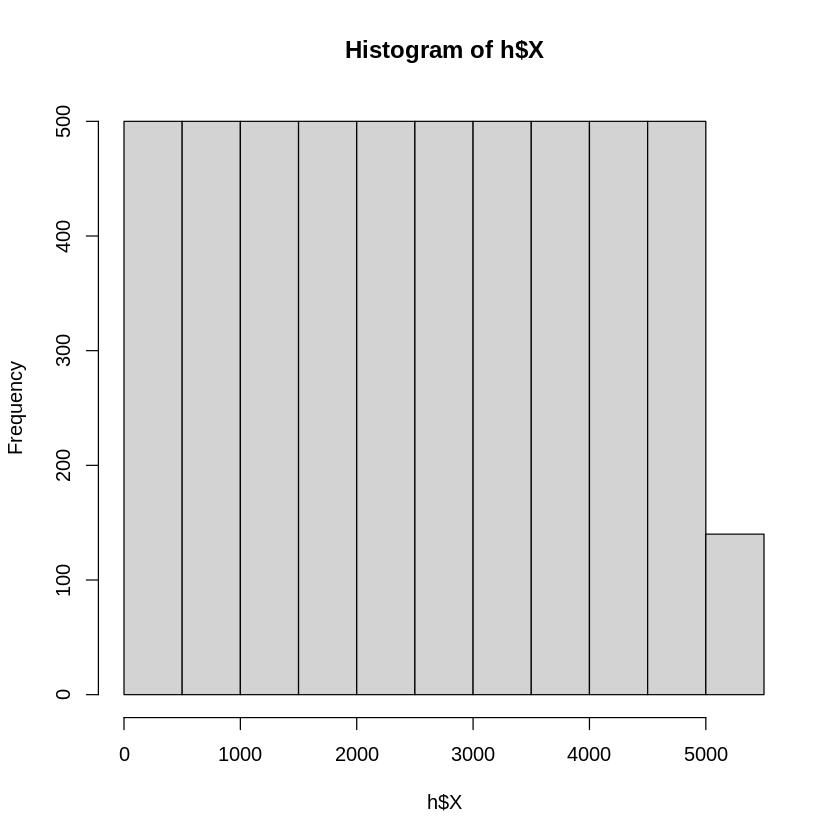

In [42]:
hist(h$X)

## Explorations of columns: Id

In [48]:
print(paste('Rows: ',nrow(h)))

[1] "Rows:  5140"


In [49]:
print(paste('Max: ',max(h$Id),' Min: ',min(h$Id)))

[1] "Max:  1047418  Min:  1050"


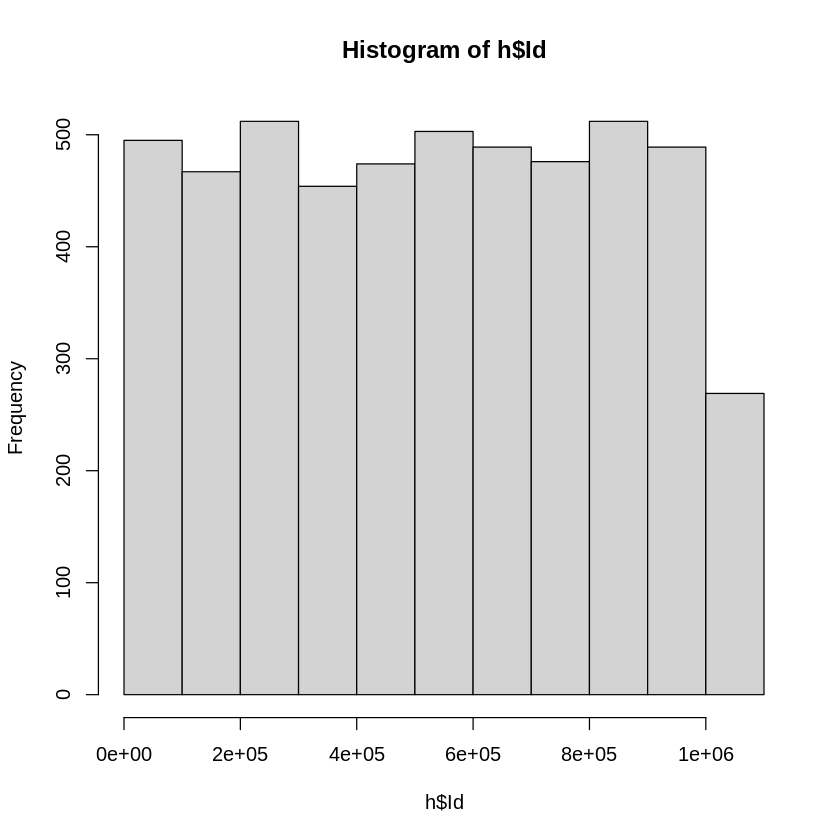

In [50]:
hist(h$Id)

## Explorations of columns: IdDueno

Here we will use the functions from before, and the table function, that allows us to determine whether there are repetition. We plot it in an histogram and there we can see that there are indeed repetitions in the IdDueno field. 

In [51]:
names(h)[names(h) == 'IdDue.o'] <- 'IdDueno'

In [52]:
print(paste('Rows: ',nrow(h)))

[1] "Rows:  5140"


In [53]:
print(paste('Max: ',max(h$IdDueno),' Min: ',min(h$IdDueno)))

[1] "Max:  7202  Min:  333"


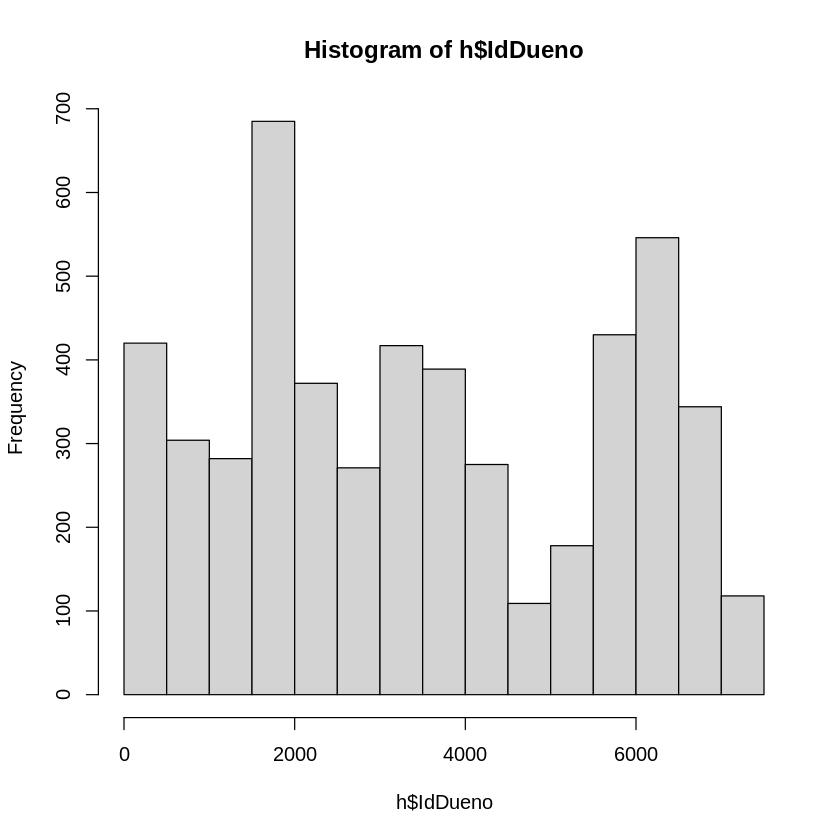

In [54]:
hist(h$IdDueno)

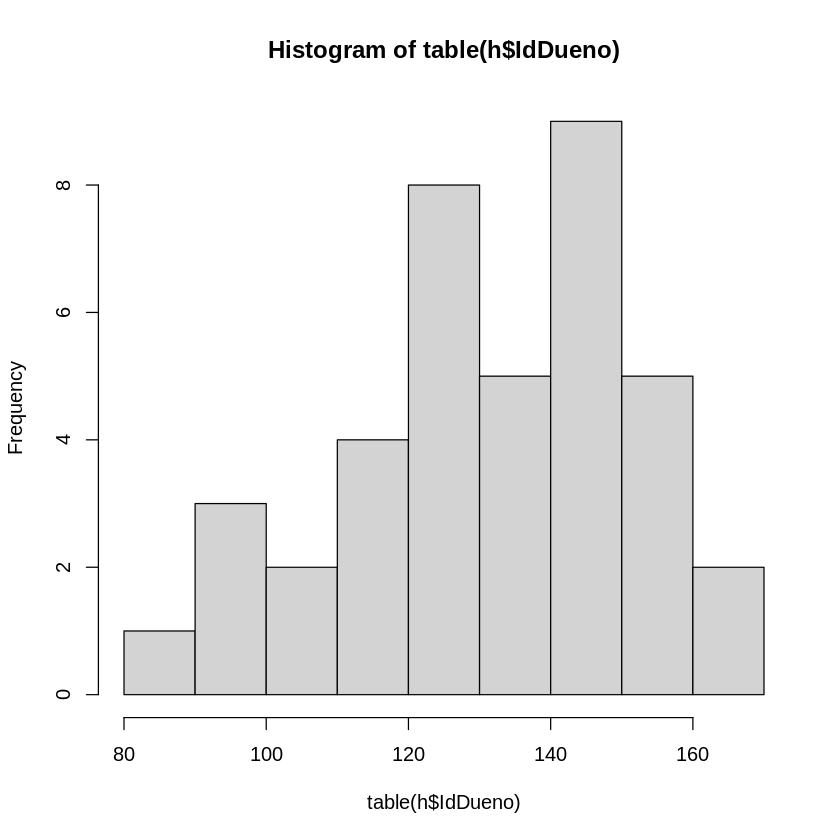

In [61]:
hist(table(h$IdDueno))

## Explorations of other columns 
The exploration of other columns is similar, we will find that also Ventas has two possible values like sexo fields, for example. In this case, these are two possible values: 0 and 1, there being more 0's than 1's. 

In [64]:
table(h$Venta)


   0    1 
4832  308 

# Correlations

Other very interesting thing is searching for correlations between two variables. For that, we have the cor function, which we introduce as a final part of this class. However, we first need to select the numeric fields only. For that, we can export data and use other visualization tools like Python libraries, or we can install and import the $corrplot$ library from R (that way, we learn installing and importing in R). 

In [74]:
h_num <- h[unlist(lapply(h, is.numeric))]  

In [83]:
m_cor <- cor(h_num)

In [78]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [79]:
library(corrplot)

corrplot 0.92 loaded



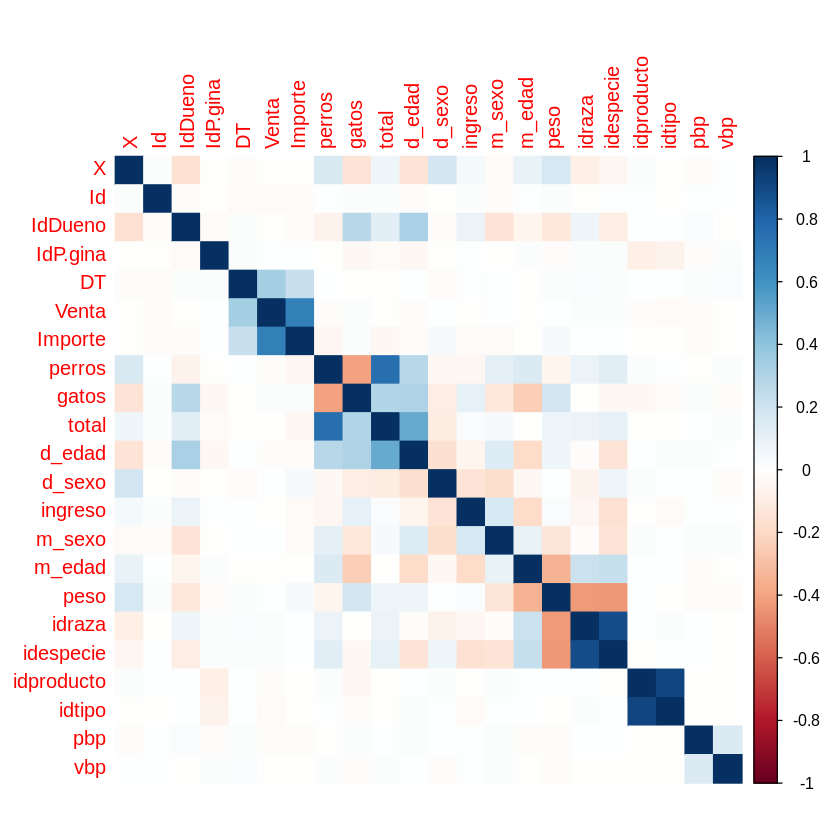

In [85]:
corrplot(m_cor, method="color")